# Trendlines

Creating scatter plots with trendlines using various Python graphing libraries.

First generate some data and create a dataframe from it


In [1]:
import numpy as np
import pandas as pd

# Generate random data
x = np.random.rand(100) * 100  # Random x values between 0 and 100
y = 3 * x + np.random.randn(100) * 30  # y = 3x with noise

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

ModuleNotFoundError: No module named 'numpy'

### Plotly Express

In [32]:
import plotly.express as px

# set the default plotly express template to 'plotly_white'
px.defaults.template = 'plotly_white'
# set the default width and height for all subsequent plotly figures
px.defaults.width = 800
px.defaults.height = 600

# Plot scatter chart with trendline
fig = px.scatter(data, x='x', y='y', title='Scatter Chart with Trendline',
                 labels={'x': 'X-axis', 'y': 'Y-axis'},
                 trendline='ols', trendline_color_override='red')  # Ordinary Least Squares regression for trendline

# Show the plot
fig.show()

# Extract trendline results
results = px.get_trendline_results(fig)
ols_model = results.iloc[0]["px_fit_results"]  # OLS regression model

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)


Random Data:
P-Value: 4.2538726666060726e-49
R²: 0.8916877682526126


### Plotly Graph Objects

In [33]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import statsmodels.api as sm

# Create a scatter plot
fig = make_subplots()
fig.add_trace(go.Scatter(x=data['x'], y=data['y'], mode='markers', name='Data Points'))

# Fit the OLS model
ols_model = sm.OLS(data['y'], sm.add_constant(data['x'])).fit()

# Add trendline
fig.add_trace(go.Scatter(x=data['x'], y=ols_model.predict(sm.add_constant(data['x'])), mode='lines', name='Trendline', line=dict(color='red')))

# Update layout
fig.update_layout(title='Scatter Chart with Trendline',
                  xaxis_title='X-axis',
                  yaxis_title='Y-axis',
                  template='plotly_white',
                  width=800,
                  height=600)

# Show the plot
fig.show()

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\2925010856.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


### Matplotlib

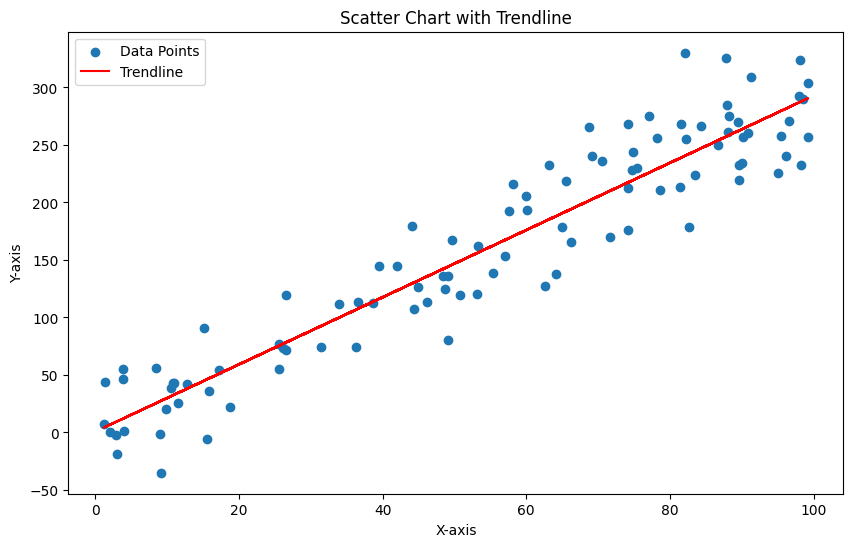

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\3784202550.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Plot scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], label='Data Points')

# Fit the OLS model
X = sm.add_constant(data['x'])  # Adds a constant term to the predictor
ols_model = sm.OLS(data['y'], X).fit()

# Plot the trendline
plt.plot(data['x'], ols_model.predict(X), color='red', label='Trendline')

# Add title and labels
plt.title('Scatter Chart with Trendline')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)

### Altair

In [35]:
import altair as alt

# Create a scatter plot with a trendline using Altair
scatter = alt.Chart(data).mark_point().encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
).properties(
    title='Scatter Chart with Trendline',
    width=800,
    height=600
)

# Fit the OLS model
ols_model = sm.OLS(data['y'], X).fit()

# Create a trendline
trendline = alt.Chart(data).mark_line(color='red').encode(
    x='x',
    y=alt.Y('y', scale=alt.Scale(domain=[data['y'].min(), data['y'].max()]))
).transform_regression(
    'x', 'y', method='linear'
)

# Combine the scatter plot and trendline
chart = scatter + trendline

# Display the chart
chart.display()

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)

alt.LayerChart(...)

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\2933621846.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


### Bokeh

In [36]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.io import output_notebook

# Prepare the data
source = ColumnDataSource(data)

# Create a new plot
p = figure(title="Scatter Chart with Trendline", width=800, height=600)
p.xaxis.axis_label = 'X-axis'
p.yaxis.axis_label = 'Y-axis'

# Add scatter plot
p.circle('x', 'y', source=source, size=8, color='blue', alpha=0.5, legend_label='Data Points')

# Fit the OLS model
ols_model = sm.OLS(data['y'], X).fit()

# Add trendline
p.line(data['x'], ols_model.predict(X), line_width=2, color='red', legend_label='Trendline')

# Show the plot
output_notebook()
show(p)

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\351932528.py:14: BokehDeprecationWarning: 'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.


Loading BokehJS ...

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\351932528.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


### Seaborn

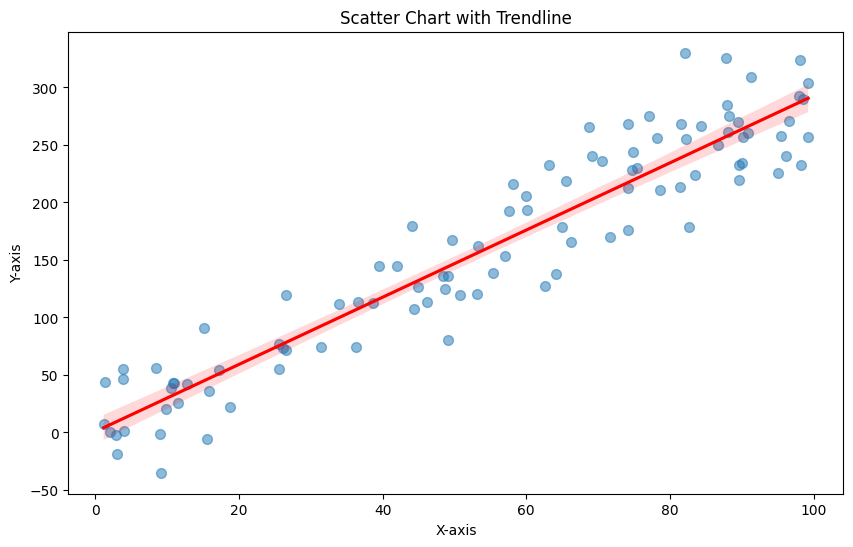

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\2468068972.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a trendline using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='x', y='y', data=data, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Scatter Chart with Trendline')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)


### Seaborn Objects

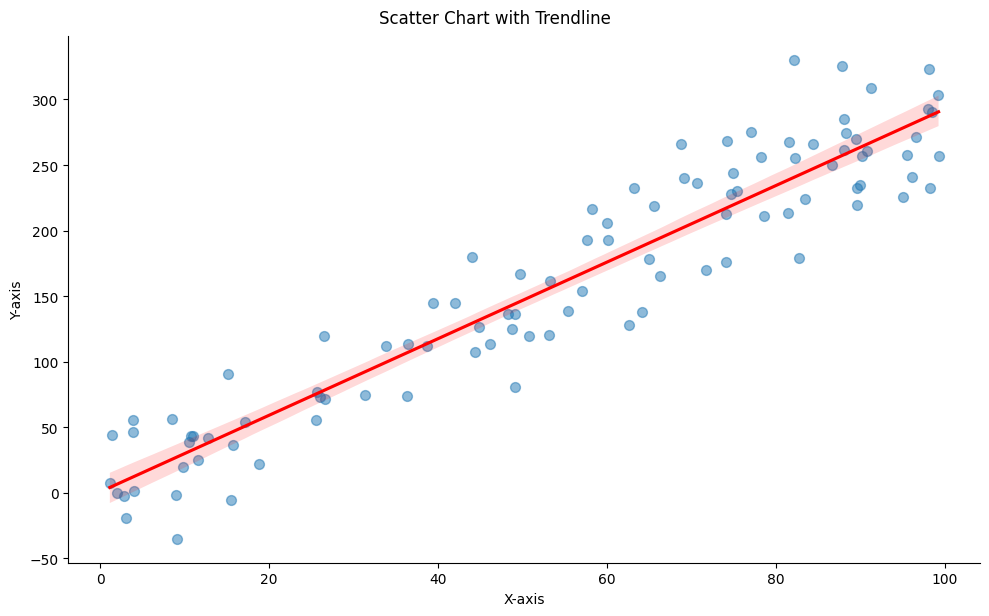

Random Data:
P-Value: 4.2538726666059526e-49
R²: 0.8916877682526126


C:\Users\jones\AppData\Local\Temp\ipykernel_14972\289142192.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid object
g = sns.FacetGrid(data, height=6, aspect=10/6)

# Map the regplot function to the FacetGrid
g.map(sns.regplot, 'x', 'y', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Add title and labels
g.fig.suptitle('Scatter Chart with Trendline', y=1.02)
g.set_axis_labels('X-axis', 'Y-axis')

# Show the plot
plt.show()

# Print p-value and R²
print("Random Data:")
print("P-Value:", ols_model.pvalues[1])  # p-value for the slope
print("R²:", ols_model.rsquared)


---